In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt

from tqdm import tqdm
from collections import defaultdict

In [20]:
from matplotlib import rc
import matplotlib.font_manager as fm
import matplotlib

# 한글깨짐
fm.get_fontconfig_fonts()
font_location = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [21]:
"""
    총 aspect : 25개
    제품 전체 : 품질, 디자인, 편의성, 일반, 가격, 다양성, 인지도 (7개)
    패키지/구성품 : 디자인, 다양성, 일반, 편의성, 품질, 가격 (6개)
    본품 : 일반, 다양성, 품질, 인지도, 편의성, 디자인, 가격 (7개)
    브랜드 : 일반, 인지도, 디자인, 품질, 가격 (5개)

    sentiment : negative, netural, positive (3개)
"""

'\n    총 aspect : 25개\n    제품 전체 : 품질, 디자인, 편의성, 일반, 가격, 다양성, 인지도 (7개)\n    패키지/구성품 : 디자인, 다양성, 일반, 편의성, 품질, 가격 (6개)\n    본품 : 일반, 다양성, 품질, 인지도, 편의성, 디자인, 가격 (7개)\n    브랜드 : 일반, 인지도, 디자인, 품질, 가격 (5개)\n\n    sentiment : negative, netural, positive (3개)\n'

In [22]:
TRAIN_DATA_PATH= './jsonl_data/nikluge-sa-2022-train.jsonl'
DEV_DATA_PATH= './output_file/dev_result_3.jsonl'
TEST_DATA_PATH= './jsonl_data/nikluge-sa-2022-test.jsonl'

In [23]:
def read_jsonl(path):
    data= []
    with open(path, 'r') as f:
        for i, line in tqdm(enumerate(f)):
            data.append(json.loads(line))
    
    return data

In [24]:
devset= read_jsonl(DEV_DATA_PATH)
testset= read_jsonl(TEST_DATA_PATH)

2127it [00:00, 131987.29it/s]
2127it [00:00, 169532.04it/s]


In [25]:
def convert_jsonl_to_df(jsonl_data):
    multi_label_count_dict= defaultdict(lambda: 0)
    data_dict= defaultdict(list)
    for js_data in tqdm(jsonl_data):
        id, sentence, annotation= js_data['id'], js_data['sentence_form'], js_data['annotation']
    
        tmp_aspect, sentiment= annotation[0]
        
        aspect_1, aspect_2= tmp_aspect.split('#')
        data_dict['id'].append(id)
        data_dict['sentence'].append(sentence)
        data_dict['aspect_1'].append(aspect_1)
        data_dict['aspect_2'].append(aspect_2)
        data_dict['aspect_concat'].append(str(aspect_1) + '#' + str(aspect_2))
        data_dict['sentiment'].append(sentiment)
            

    return pd.DataFrame(data_dict)

def plot_multi_label(count_dict):
    ax=sns.barplot(x=list(count_dict.keys()), y = [count_dict[k] for k in count_dict.keys()])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 15)
    plt.title("example별 annotation count")
    plt.show()



In [26]:
dev_df= convert_jsonl_to_df(devset)
dev_df.head()

100%|██████████| 2127/2127 [00:00<00:00, 496675.46it/s]


,id,sentence,aspect_1,aspect_2,aspect_concat,sentiment
0,nikluge-sa-2022-test-00001,하나 사려고 알아보는 중인데 맘에드는거 발견,제품 전체,일반,제품 전체#일반,positive
1,nikluge-sa-2022-test-00002,동양인 피부톤과 잘 어울리고 우아한 분위기를 풍긴다네?,제품 전체,일반,제품 전체#일반,positive
2,nikluge-sa-2022-test-00003,근데 이건 마르살라보다 더 지나친 색 같은데..,본품,일반,본품#일반,negative
3,nikluge-sa-2022-test-00004,나스 색조가 다 그렇지만서도 어데이셔스 라인은 진짜 색 기막히게 뽑는것 같다,본품,일반,본품#일반,positive
4,nikluge-sa-2022-test-00005,색상만 보면 이걸 어떻게 발라.. 싶겠지만 의외로 너무너무 괜찮다,본품,일반,본품#일반,neutral


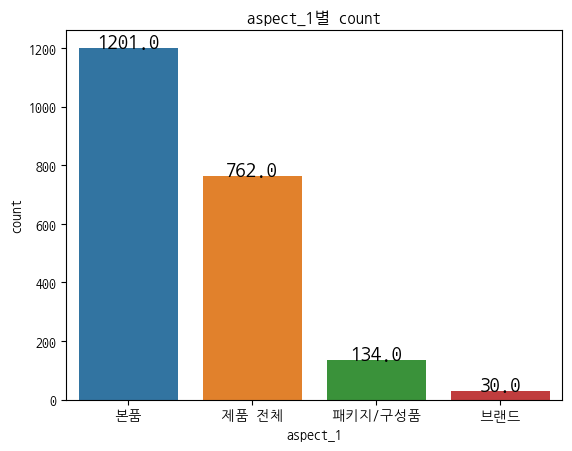

In [28]:
ax= sns.countplot(x= 'aspect_1', data=dev_df, order = dev_df['aspect_1'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 15)
plt.title("aspect_1별 count")
plt.show()

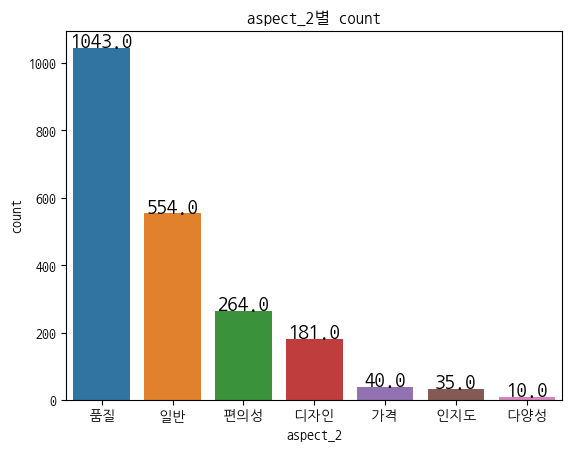

In [29]:
ax= sns.countplot(x= 'aspect_2', data=dev_df, order = dev_df['aspect_2'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 15)
plt.title("aspect_2별 count")
plt.show()

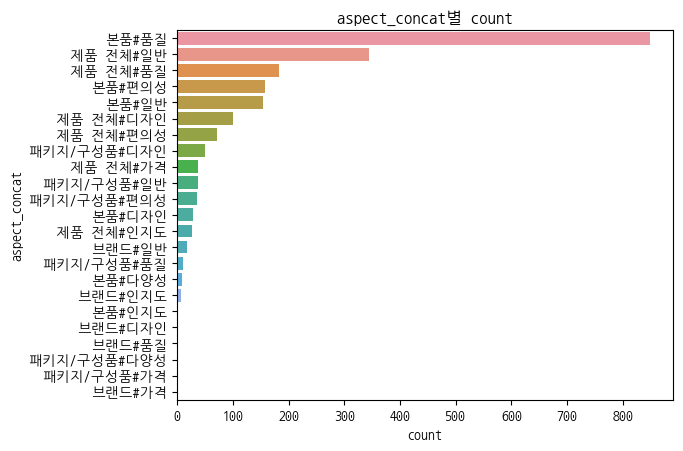

In [30]:
ax= sns.countplot(y= 'aspect_concat', data=dev_df, order = dev_df['aspect_concat'].value_counts().index)
plt.title("aspect_concat별 count")
plt.show()

In [31]:
corr_df= dev_df.groupby('id')['aspect_concat'].apply(list)
combine_dict= defaultdict(lambda: 0)
cnt= 0
for val in corr_df.values:
  if '제품 전체#일반' in val and '본품#품질' in val:
    cnt+=1
  if len(val)!= 1: # for multi annot
    combine_dict[str(val)]+=1
print(combine_dict)


defaultdict(<function <lambda> at 0x7fd4cb5454c0>, {})


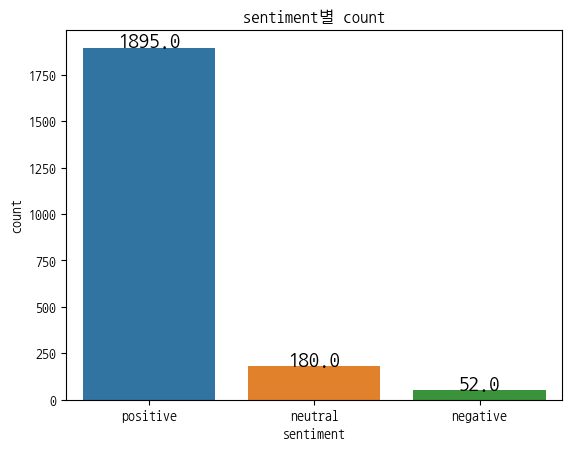

In [35]:
ax= sns.countplot(x= 'sentiment', data=dev_df, order = dev_df['sentiment'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 15)
plt.title("sentiment별 count")
plt.show()

In [34]:


data= []
with open('./submission.jsonl', 'r') as f:
  for i, val in enumerate(f):
    data.append(json.loads(val))

with open('./submit.json', 'w') as f:
  json.dump(data, f, ensure_ascii=False)
    